In [1]:
from google.colab import files
uploaded = files.upload()

Saving Student_Performance.csv to Student_Performance.csv


In [2]:
import pandas as pd

df = pd.read_csv("Student_Performance.csv")
df.head()

,Attendance_Percentage,Midterm_Marks,Assignment_Score,Study_Hours_Per_Week,Previous_GPA,Final_Result
0,49,12,73,36,3.10,Pass
1,55,35,10,37,3.06,Fail
2,96,98,1,31,3.24,Pass
3,44,82,17,13,2.29,Fail
4,88,90,59,32,3.98,Pass


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Attendance_Percentage  200 non-null    int64  
 1   Midterm_Marks          200 non-null    int64  
 2   Assignment_Score       200 non-null    int64  
 3   Study_Hours_Per_Week   200 non-null    int64  
 4   Previous_GPA           200 non-null    float64
 5   Final_Result           200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


,Attendance_Percentage,Midterm_Marks,Assignment_Score,Study_Hours_Per_Week,Previous_GPA
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,70.235000,50.295000,48.670000,20.990000,2.945000
std,18.045999,29.719086,29.738409,10.653044,0.604926
min,40.000000,0.000000,0.000000,1.000000,2.010000
25%,54.750000,24.000000,24.000000,12.000000,2.437500
50%,72.000000,49.000000,47.500000,21.000000,2.905000
75%,86.000000,77.000000,74.250000,30.000000,3.425000
max,99.000000,99.000000,99.000000,39.000000,4.000000


###Target Variable Encoding (Pass / Fail)

In [4]:
df['Final_Result'] = df['Final_Result'].map({'Pass': 1, 'Fail': 0})

###Feature & Target Separation

In [5]:
X = df.drop('Final_Result', axis=1)
y = df['Final_Result']

###Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

###Train Decision Tree Model

In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

###Model Evaluation

In [8]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.79      0.85      0.81        26

    accuracy                           0.75        40
   macro avg       0.73      0.71      0.72        40
weighted avg       0.74      0.75      0.75        40



###Decision Tree Visualization

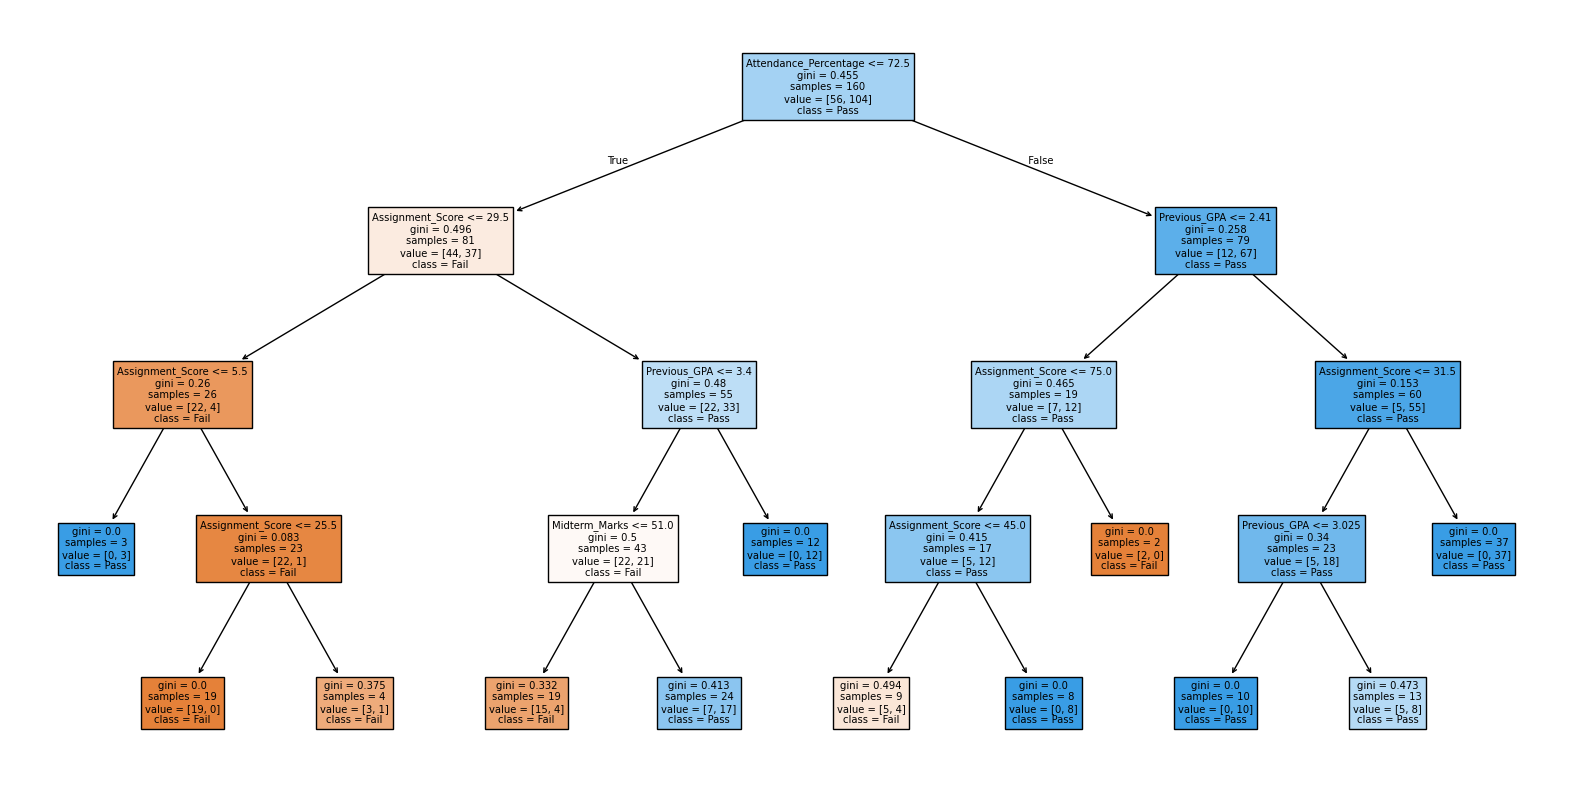

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Fail', 'Pass'],
    filled=True
)
plt.show()

###Overfitting vs Underfitting (Short Discussion)

**Overfitting:**
If the tree is too deep, it memorizes training data and performs poorly on new data.

**Underfitting:**
A very shallow tree cannot capture important patterns.